<a href="https://colab.research.google.com/github/benvekedim/Clustering/blob/main/AgglomerativeClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

#data
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data[:, [2,3]]

#model
model = AgglomerativeClustering(n_clusters=3)

# fit and predict
prediction = model.fit_predict(data)
prediction



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [2]:
clusters = np.unique(prediction)
clusters

array([0, 1, 2])

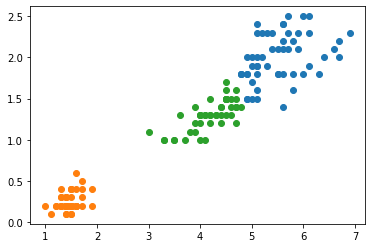

In [3]:
for cluster in clusters:
  row_ix = np.where(prediction==cluster)
  plt.scatter(data[row_ix,0],data[row_ix,1])
plt.show()

In [4]:
#silhouette_score

from sklearn.metrics import silhouette_score
score = silhouette_score(X=data,labels=prediction)
score

0.6573949269287823

In [59]:
links = ["average","single","complete"]
metrics = ["euclidean","cosine","manhattan"]
sil_score = []
for i in metrics:
  for j in links:
    model = AgglomerativeClustering(n_clusters=3,affinity=i,linkage=j)
    prediction = model.fit_predict(data)
    score = silhouette_score(X=data,labels=prediction)
    sil_score.append(score)
    


print(sil_score)

[0.6573949269287823, 0.5346815260603673, 0.6573949269287823, 0.18561482790106593, 0.3024157433855853, 0.18561482790106593, 0.6573949269287823, 0.2916572554981225, 0.6573949269287823]


In [39]:
links = ["average","single","complete"]
metrics = ["euclidean","cosine","manhattan"]

metric_link = [[i+"-"+j] for j in links for i in metrics]
metric_link

[['euclidean-average'],
 ['cosine-average'],
 ['manhattan-average'],
 ['euclidean-single'],
 ['cosine-single'],
 ['manhattan-single'],
 ['euclidean-complete'],
 ['cosine-complete'],
 ['manhattan-complete']]

In [60]:
keys = sil_score
values = metric_link

In [57]:
list(zip(keys,values))

[(0.6573949269287823, ['euclidean-average']),
 (0.5346815260603673, ['cosine-average']),
 (0.6573949269287823, ['manhattan-average']),
 (0.18561482790106593, ['euclidean-single']),
 (0.3024157433855853, ['cosine-single']),
 (0.18561482790106593, ['manhattan-single']),
 (0.6573949269287823, ['euclidean-complete']),
 (0.2916572554981225, ['cosine-complete']),
 (0.6573949269287823, ['manhattan-complete'])]

In [65]:
sorted(list(zip(keys,values)))[4:]

[(0.5346815260603673, ['cosine-average']),
 (0.6573949269287823, ['euclidean-average']),
 (0.6573949269287823, ['euclidean-complete']),
 (0.6573949269287823, ['manhattan-average']),
 (0.6573949269287823, ['manhattan-complete'])]